<h1> Dora the explorer

In [2]:
%load_ext autoreload

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [45]:
%autoreload
import sys
print(sys.path.append(sys.path[0][0:-4] + 'mikael'))
from pipeline import Pipin
%load_ext autoreload

None
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
pipe = Pipin()
# all_data = pipe.get_combined_datasets(offset_years=True)
all_data = pipe.get_combined_datasets(consecutive_threshold=6, offset_years=False)


In [58]:
data = all_data.copy()
scaled_data = pipe.scale_targets_in_dataset(data, location="A")

df_a = scaled_data[scaled_data['location:idx'] == 'A']
df_b = scaled_data[scaled_data['location:idx'] == 'B']
df_c = scaled_data[scaled_data['location:idx'] == 'C']

['B', 'C']
average_target 1009.9084338877925
avg_targt 188.17893182127565
scale 5.366745491184744
avg_targt 168.9083482031185
scale 5.9790320882976165


In [59]:
locations = ["B", "C"]
for location in locations:
    
    mask = scaled_data['location:idx'] == location
    offset = 5*(ord(location)-ord("A"))
    scaled_data["time"] = scaled_data["time"] + pd.DateOffset(years=offset)

In [60]:
# Test estimates
X_test_estimated_a = pd.read_parquet("../A/X_test_estimated.parquet")
X_test_estimated_b = pd.read_parquet("../B/X_test_estimated.parquet")
X_test_estimated_c = pd.read_parquet("../C/X_test_estimated.parquet")

# train Estimate
X_train_estimated_a = pd.read_parquet("../A/X_train_estimated.parquet")
X_train_estimated_b = pd.read_parquet("../B/X_train_estimated.parquet")
X_train_estimated_c = pd.read_parquet("../C/X_train_estimated.parquet")

# Observations
X_train_observed_a = pd.read_parquet("../A/X_train_observed.parquet")
X_train_observed_b = pd.read_parquet("../B/X_train_observed.parquet")
X_train_observed_c = pd.read_parquet("../C/X_train_observed.parquet")

# Targets
y_a = pd.read_parquet("../A/train_targets.parquet")
y_b = pd.read_parquet("../B/train_targets.parquet")
y_c = pd.read_parquet("../C/train_targets.parquet")

# X_test_estimated_b.describe()
X_train_estimated_c.head()

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.3,1.231,1427.400024,0.0,0.0,1215.800049,1.0,281.200012,...,340.785004,-38.502998,0.0,285.200012,100.0,34387.398438,1.2,-0.3,1.1,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.3,1.231,2089.000000,0.0,0.0,1425.900024,1.0,281.200012,...,345.440002,-38.992001,0.0,285.100006,100.0,27418.500000,1.2,-0.2,1.2,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.231,2750.500000,0.0,0.0,1636.099976,1.0,281.100006,...,350.144012,-39.348000,0.0,285.100006,100.0,20508.800781,1.2,-0.1,1.2,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.2,1.230,3412.100098,0.0,0.0,1846.199951,1.0,281.100006,...,354.880005,-39.567001,0.0,285.000000,100.0,13657.799805,1.2,-0.0,1.2,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.230,4073.699951,0.0,0.0,2056.399902,1.0,281.100006,...,359.634003,-39.647999,0.0,285.000000,100.0,6865.000000,1.2,0.1,1.2,-0.0


<Axes: title={'center': 'target  C'}, xlabel='time'>

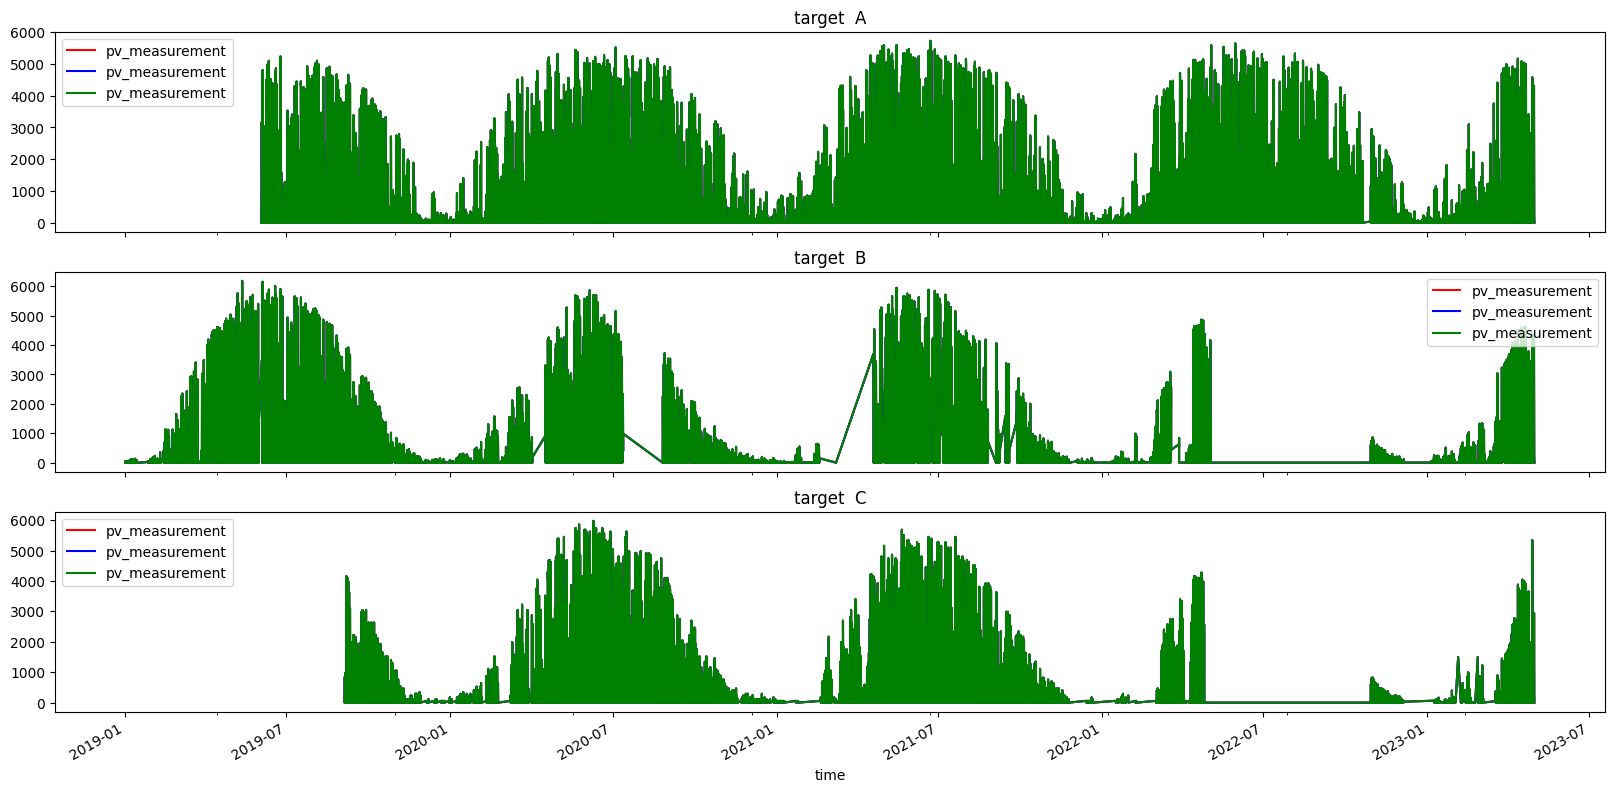

In [61]:
# correlation_matrix = np.abs(X.corr())
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'pv_measurement'
df_a[['time', feature_name]].set_index('time').plot(ax=axs[0], title='target A', color='red')
df_a[['time', feature_name]].set_index('time').plot(ax=axs[0], title='target A', color='blue')
df_a[['time', feature_name]].set_index('time').plot(ax=axs[0], title='target  A', color='green')


# feature_name2 = 'direct_rad:W'
df_b[['time', feature_name]].set_index('time').plot(ax=axs[1], title='target  B', color='red')
df_b[['time', feature_name]].set_index('time').plot(ax=axs[1], title='target  B', color='blue')
df_b[['time', feature_name]].set_index('time').plot(ax=axs[1], title='target  B', color='green')

feature_name3 = 'sun_azimuth:d'
df_c[['time', feature_name]].set_index('time').plot(ax=axs[2], title='target  C', color='red')
df_c[['time', feature_name]].set_index('time').plot(ax=axs[2], title='target  C', color='blue')
df_c[['time', feature_name]].set_index('time').plot(ax=axs[2], title='target  C', color='green')


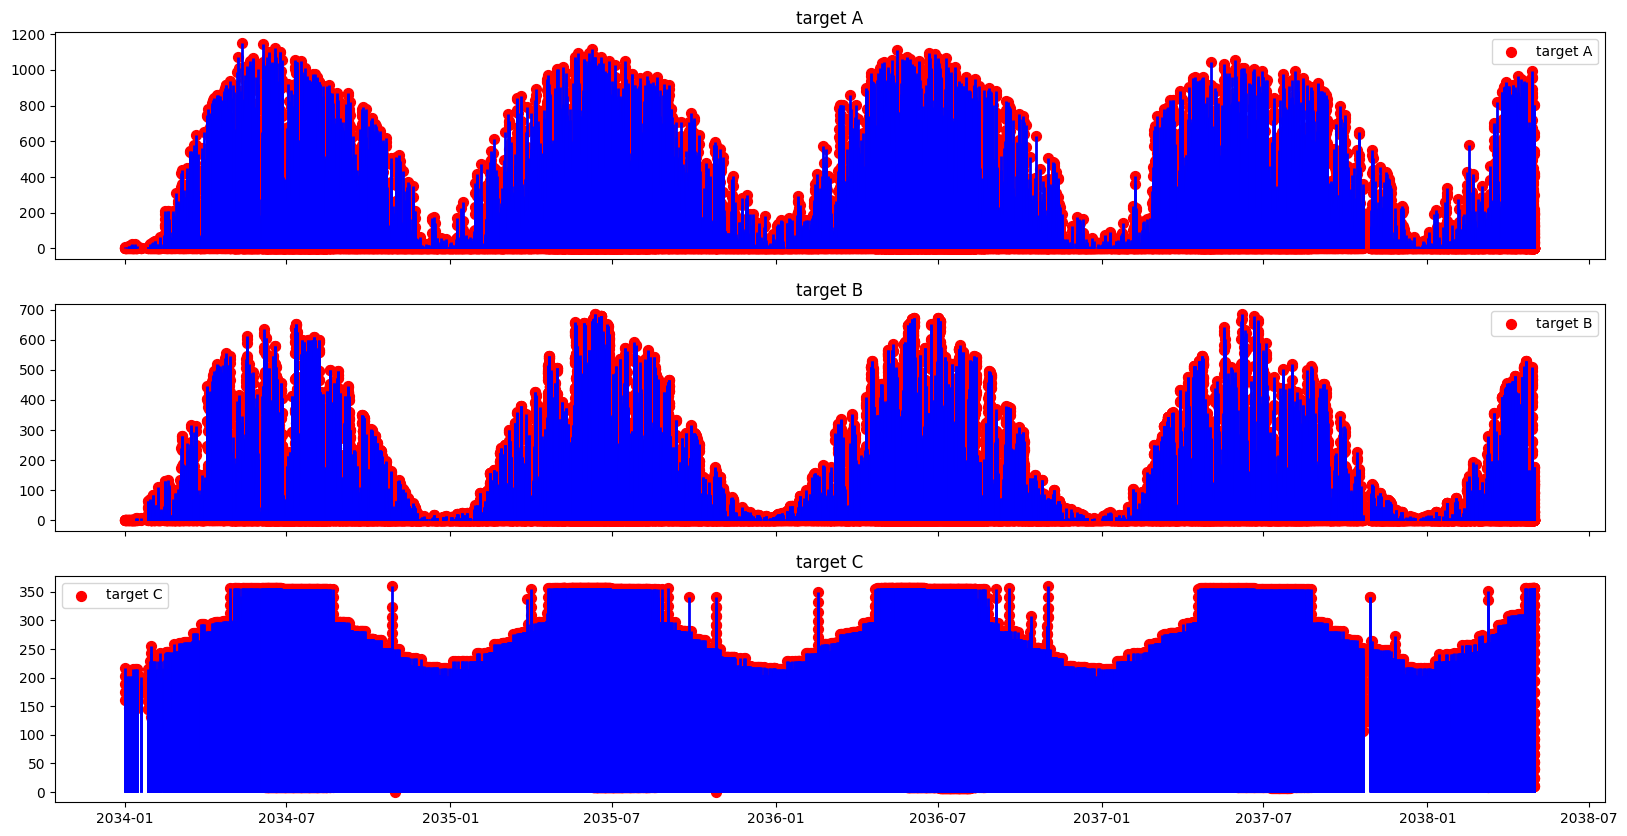

In [40]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)

# Define the feature names
feature_name = 'pv_measurement'
feature_name2 = 'direct_rad:W'
feature_name3 = 'sun_azimuth:d'

# Create scatter plots with lines going up from zero
axs[0].scatter(scaled_data['time'], scaled_data[feature_name], color='red', label='target A', s=50)
axs[0].vlines(scaled_data['time'], ymin=0, ymax=scaled_data[feature_name], colors='blue', linewidth=2)

axs[1].scatter(scaled_data['time'], scaled_data[feature_name2], color='red', label='target B', s=50)
axs[1].vlines(scaled_data['time'], ymin=0, ymax=scaled_data[feature_name2], colors='blue', linewidth=2)

axs[2].scatter(scaled_data['time'], scaled_data[feature_name3], color='red', label='target C', s=50)
axs[2].vlines(scaled_data['time'], ymin=0, ymax=scaled_data[feature_name3], colors='blue', linewidth=2)

# Add titles and legends
axs[0].set_title('target A')
axs[1].set_title('target B')
axs[2].set_title('target C')

for ax in axs:
    ax.legend()

# Show the plot
plt.show()


In [86]:
# get pv measuments that are 0
print(all_data.shape)
feature_name = 'pv_measurement'
feature_name = 'sun_azimuth:d'

pv_measurement = all_data[[feature_name, 'time']]
# pv_measurement = pv_measurement[pv_measurement == 0]
start_date = '2022-09-01 15:00:00'
end_date = '2020-01-30'
mask = (all_data['time'] > start_date) & (all_data['time'] <= end_date)
pv_measurement = pv_measurement.loc[mask]
pv_measurement.head(50)
# return df.loc[~mask]

(20628, 53)


,sun_azimuth:d,time
3205,147.865997,2020-01-02 09:00:00
3206,161.406998,2020-01-02 10:00:00
3207,175.197998,2020-01-02 11:00:00
3208,189.061005,2020-01-02 12:00:00
3209,202.791000,2020-01-02 13:00:00
3210,134.526993,2020-01-03 08:00:00
3211,147.740005,2020-01-03 09:00:00
3212,161.287994,2020-01-03 10:00:00
3213,175.087006,2020-01-03 11:00:00
3214,188.960999,2020-01-03 12:00:00


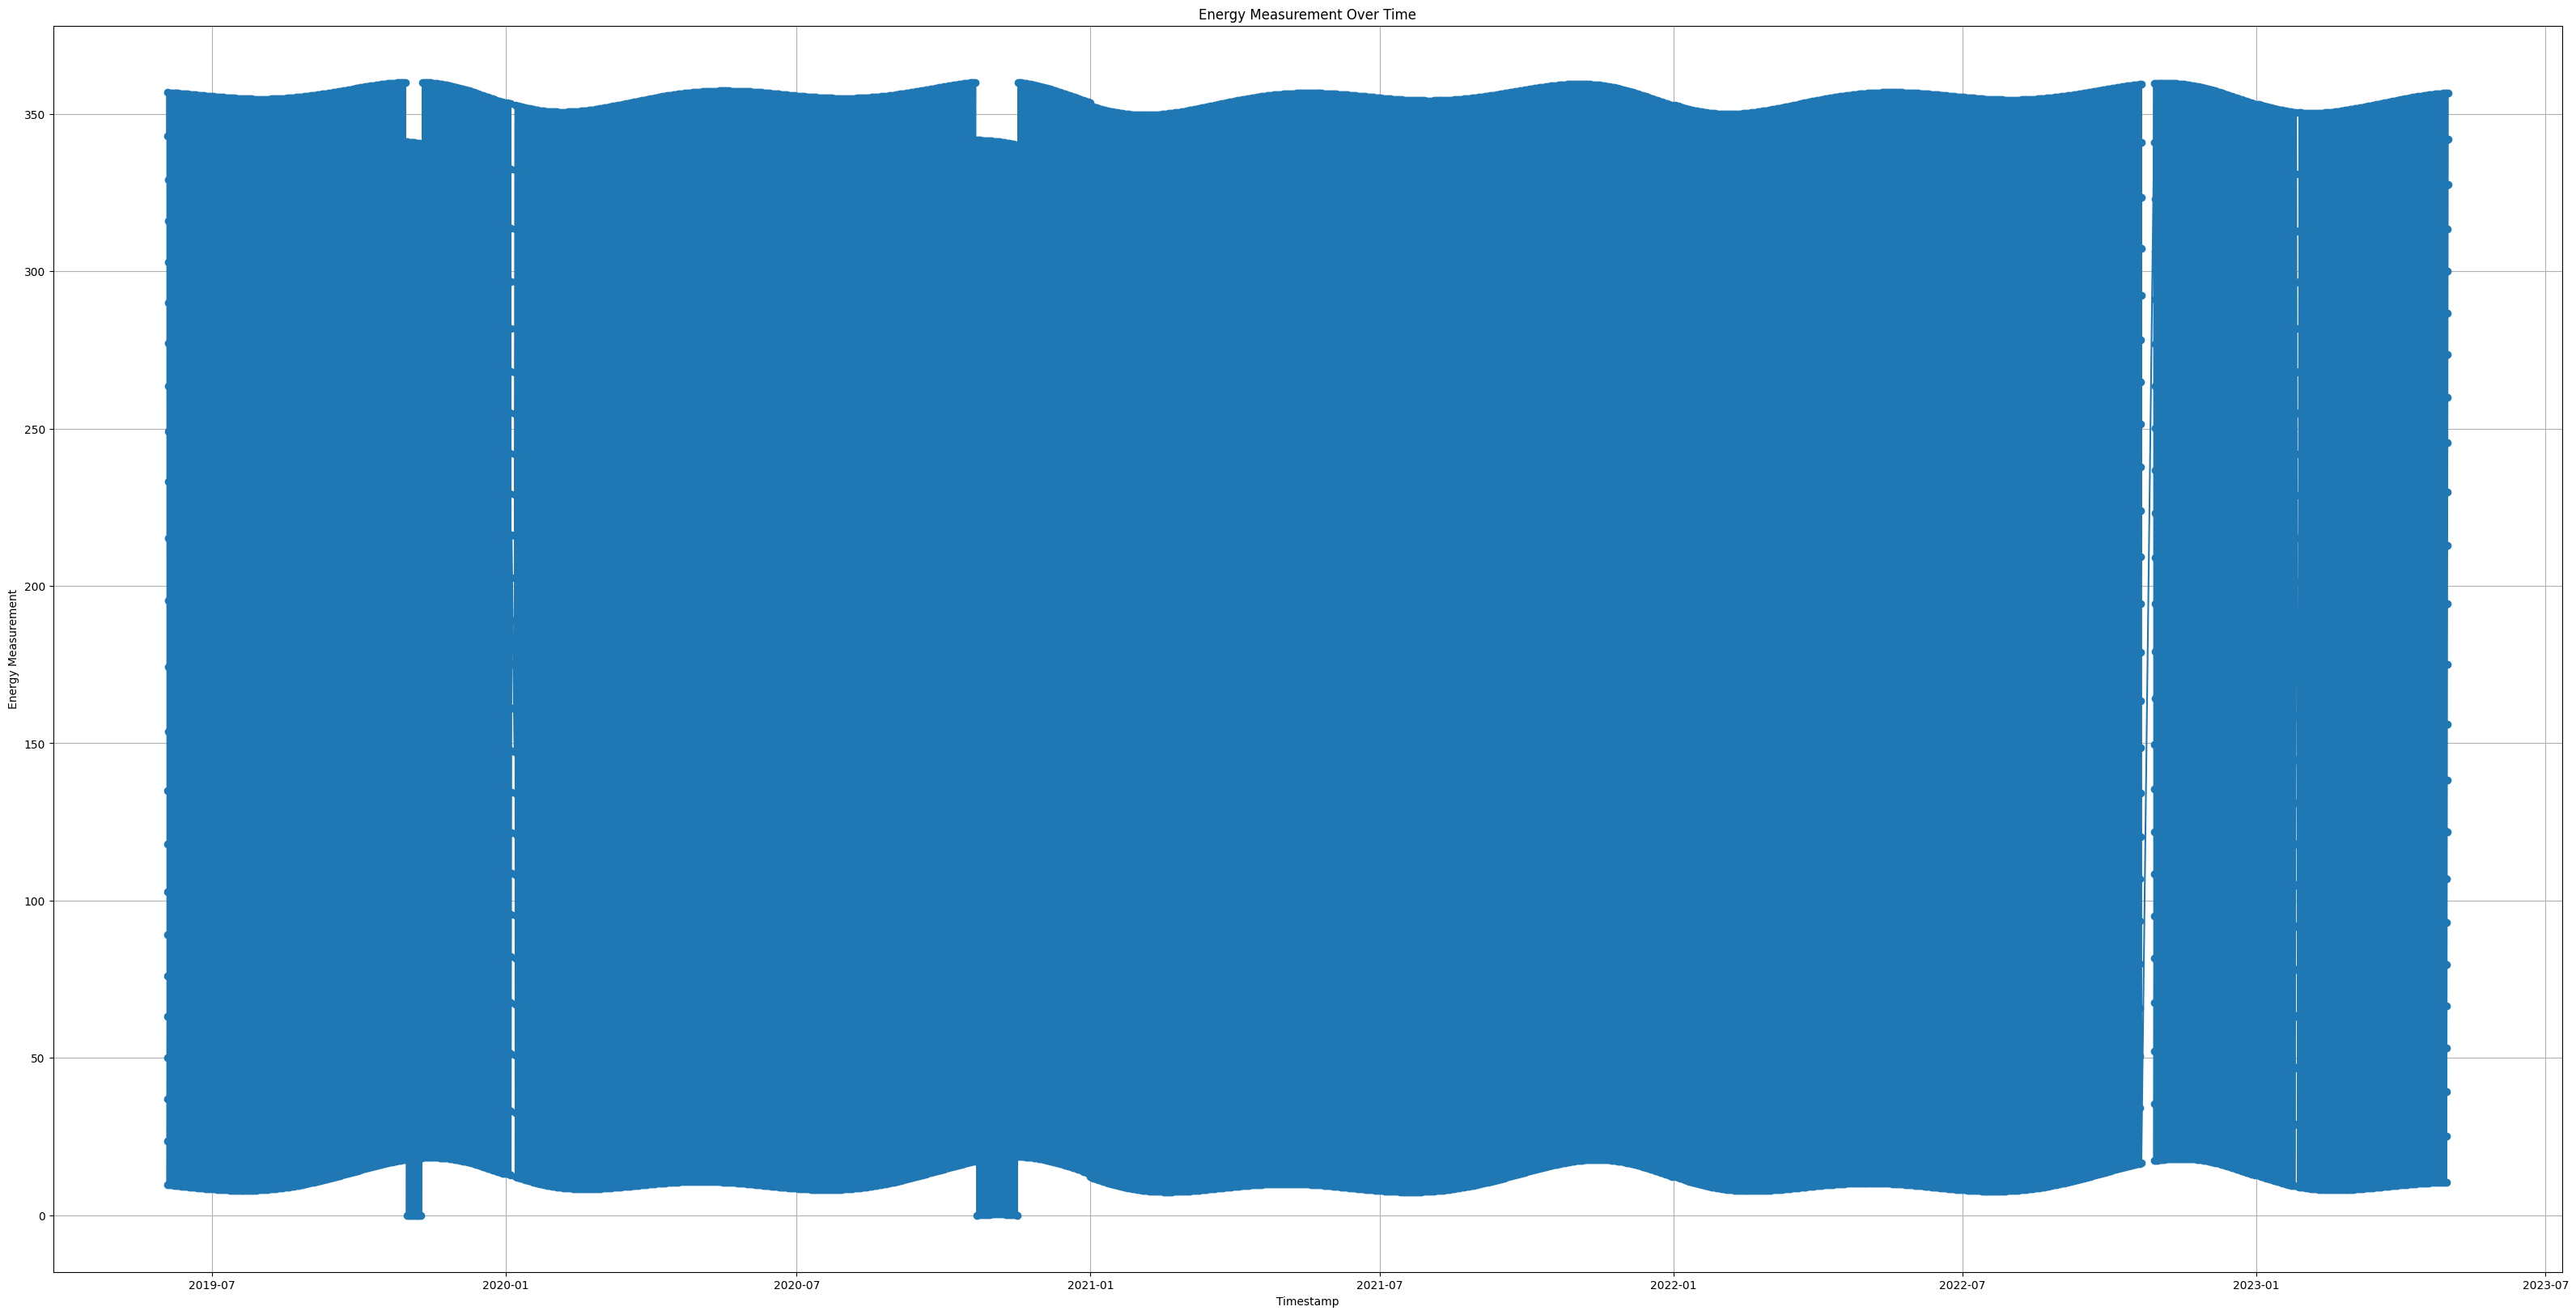

In [83]:
feature_name = 'sun_azimuth:d'

all_data['time'] = pd.to_datetime(all_data['time'])
plt.figure(figsize=(40, 20))
plt.plot(all_data['time'], all_data[feature_name], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Energy Measurement')
plt.title('Energy Measurement Over Time')
plt.grid(True)
plt.show()

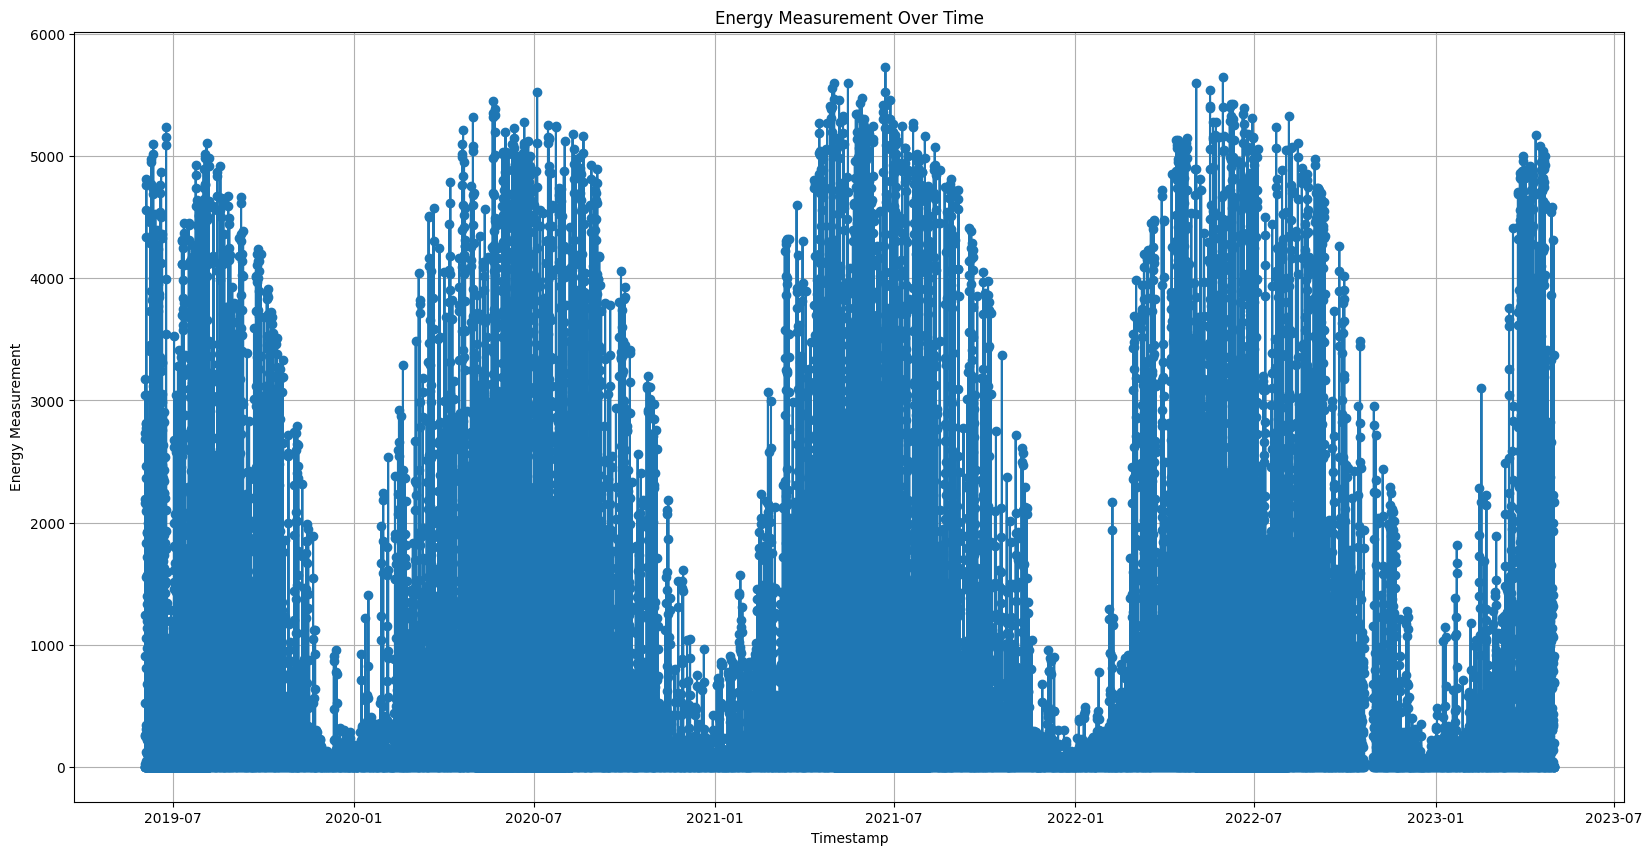

In [88]:
feature_name = "pv_measurement"
all_data['time'] = pd.to_datetime(all_data['time'])
plt.figure(figsize=(20, 10))
plt.plot(all_data['time'], all_data[feature_name], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Energy Measurement')
plt.title('Energy Measurement Over Time')
plt.grid(True)
plt.show()


<h5> The sampling device seems to be broken in the interval below

(40, 53)


/var/folders/b0/slnc__2x31jczblnsfgfmjw00000gn/T/ipykernel_69843/3032346376.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['time'] = pd.to_datetime(sub_data['time'])


Text(0.5, 0, 'Timestamp')

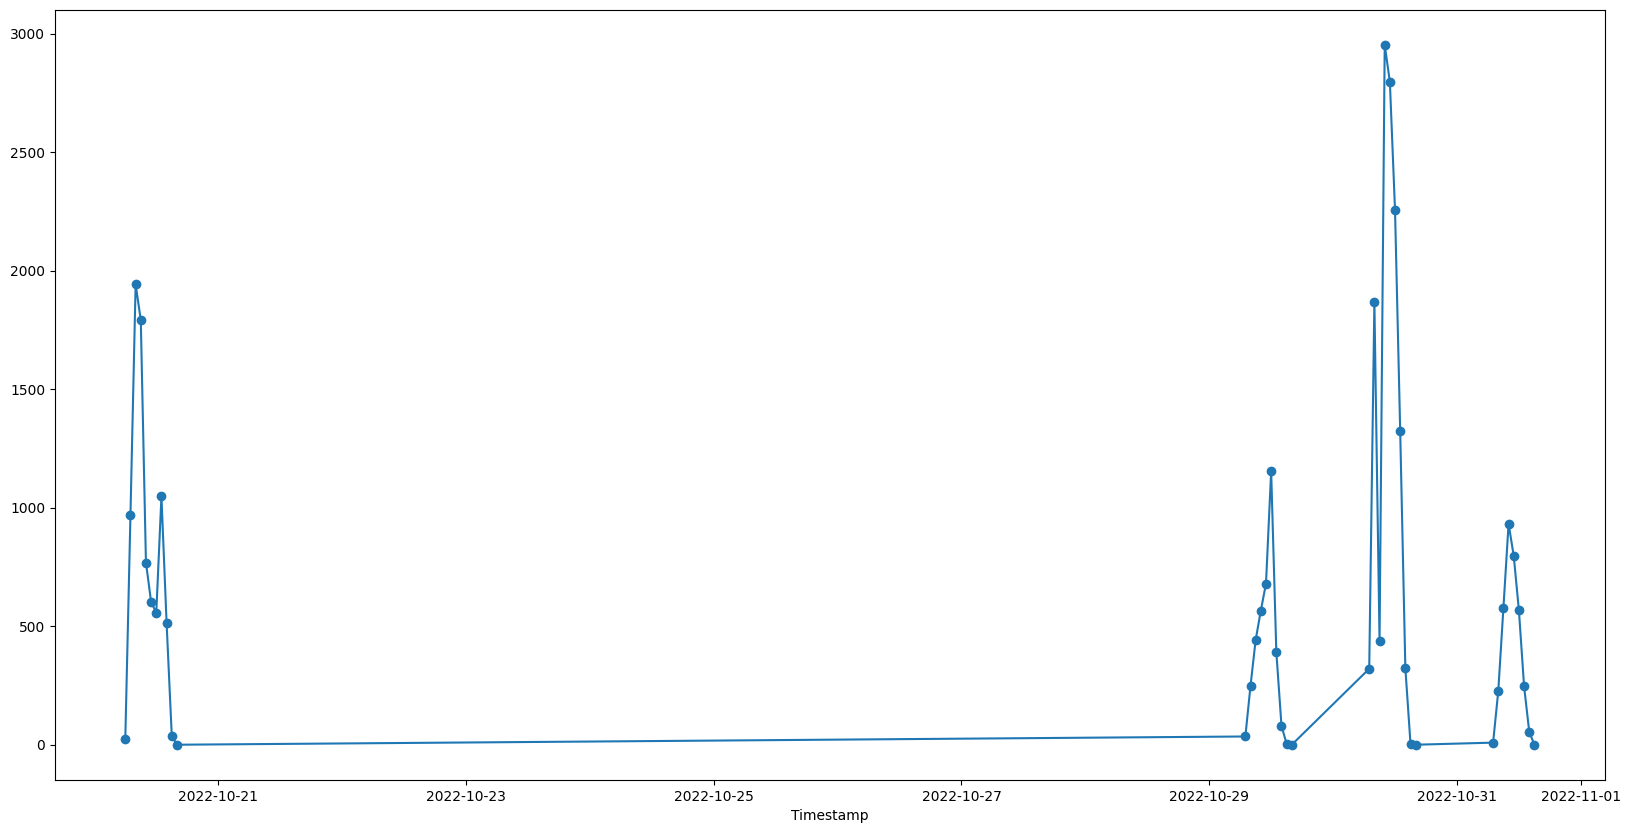

In [99]:
# select the data frames from 2020-06 to 2020-09
feature_name = "pv_measurement"
start_date = '2022-10-20'
end_date = '2022-11-01'


mask = (all_data['time'] > start_date) & (all_data['time'] <= end_date)
sub_data = all_data.loc[mask]
sub_data['time'] = pd.to_datetime(sub_data['time'])
print(sub_data.shape)
plt.figure(figsize=(20, 10))
plt.plot(sub_data['time'], sub_data[feature_name], marker='o', linestyle='-')
plt.xlabel('Timestamp')
# sub_data[['time', "pv_measurement"]]


In [17]:

# for index, row in enumerate(y_b_sub.values):
#     value = row[1]
#     last_10_values = y_b_sub.iloc[index-10:index, 1].values
#     # if np.all(last_10_values == value) and index > 10:
#     #     print(row[0], last_10_values) 
#     if value == 183.7125:
#         print(row[0], row[1])

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

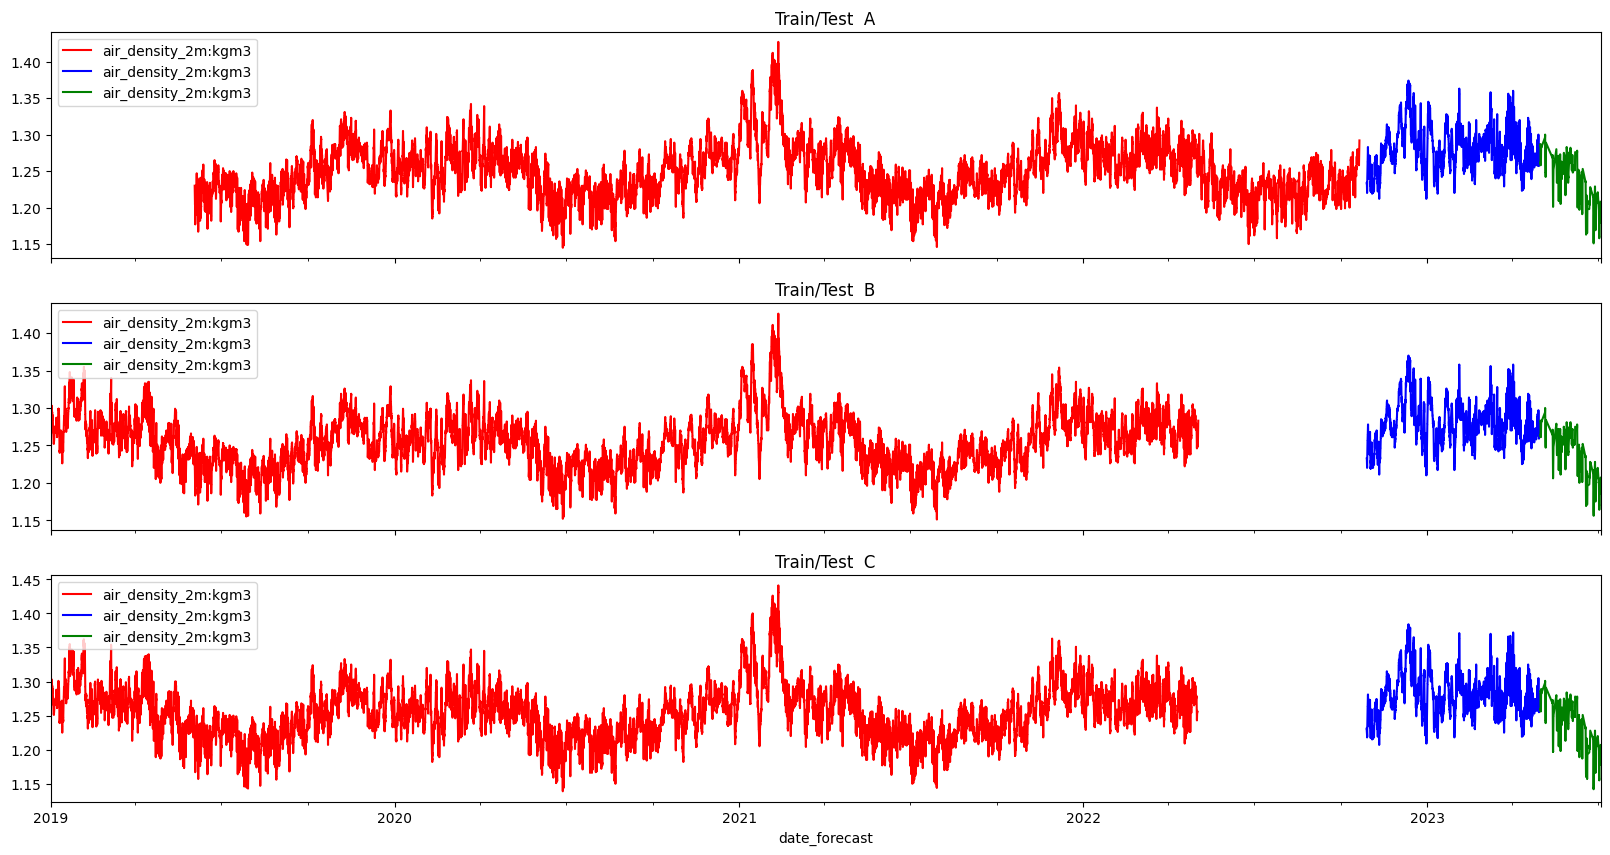

In [18]:
feature_names = X_train_observed_a.columns
# X_train_observed_a["date_forecast"] = pd.to_datetime(X_train_observed_a["date_forecast"])
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = feature_names[2]
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')


In [19]:
feature_names

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

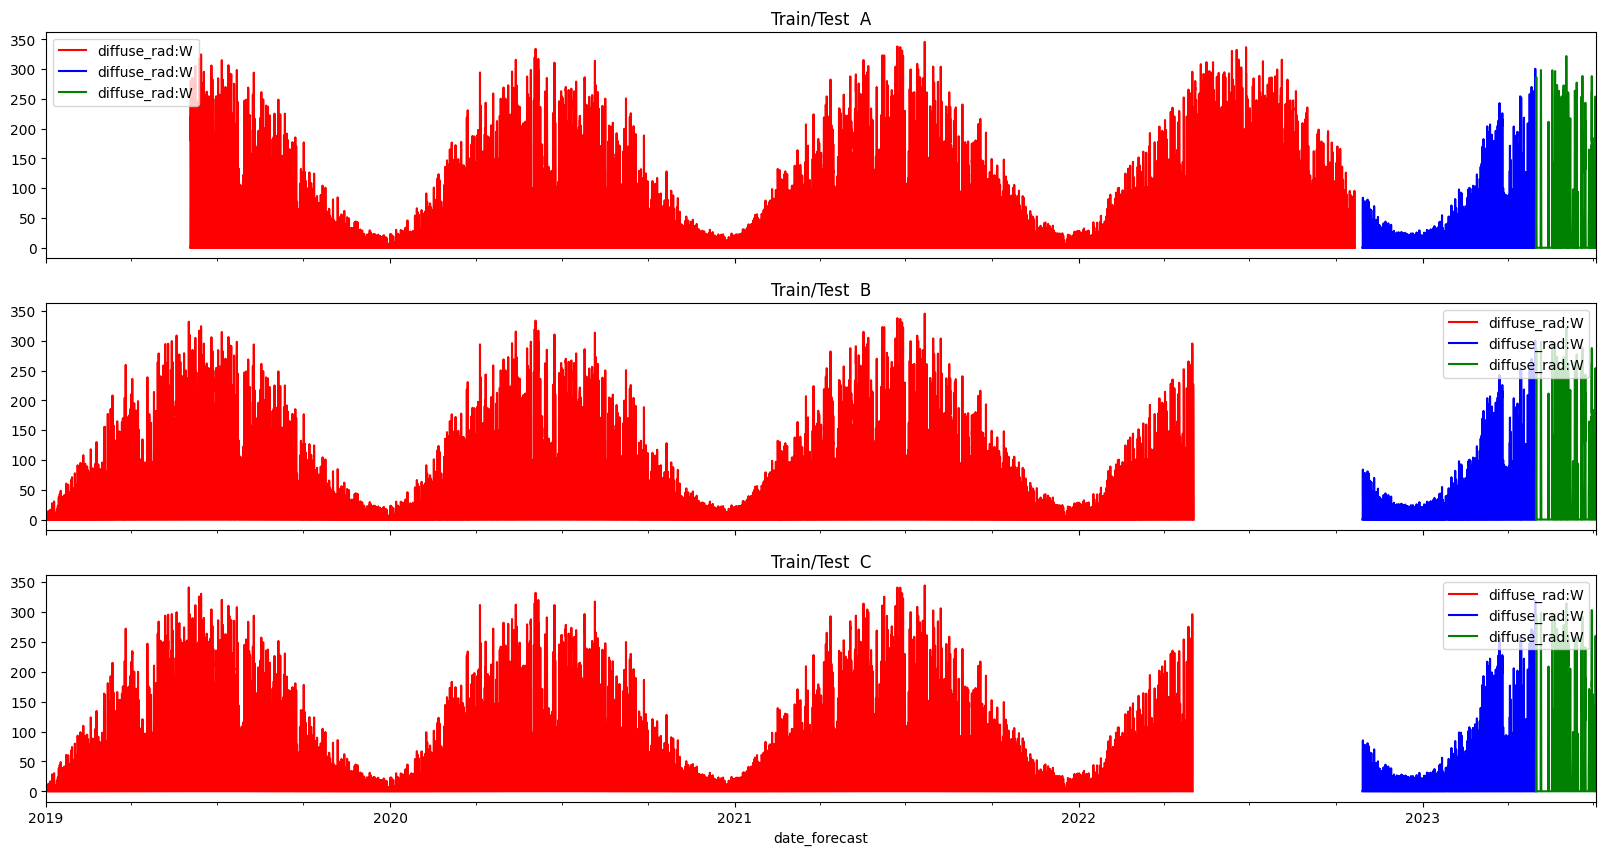

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = feature_names[2]
feature_name = "diffuse_rad:W"
# feature_name = "sun_azimuth:d"

X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')


In [21]:
feature_names

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

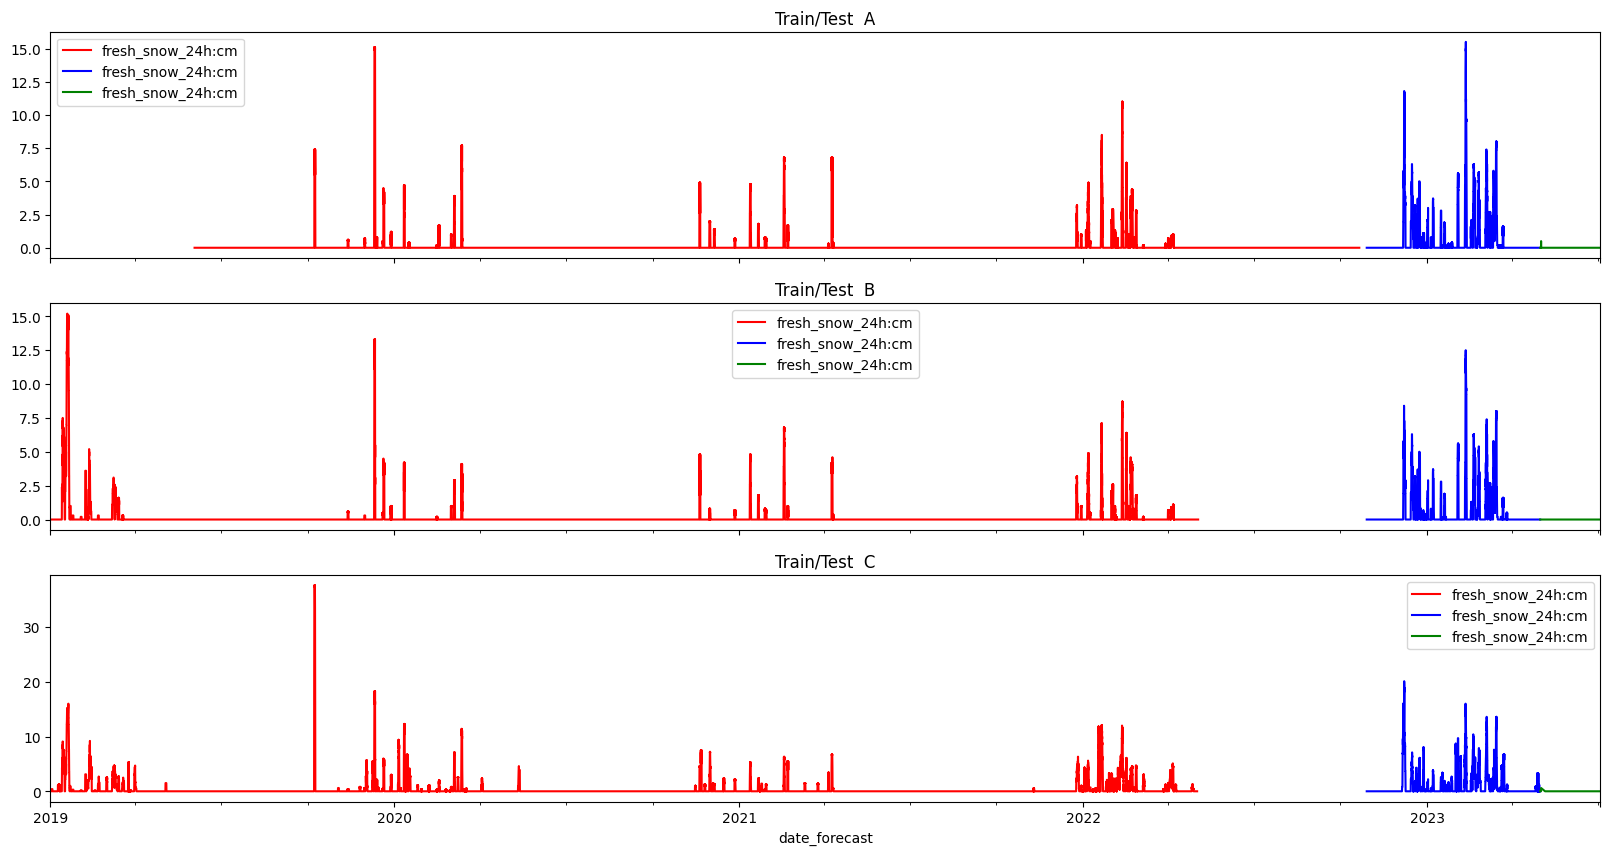

In [22]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = "sun_azimuth:d"
feature_name = "fresh_snow_24h:cm"

X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')
